In [17]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split

# Concatenate train and test images
X = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))

# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=1234)

In [19]:
import numpy as np

y_train, y_test = y_train.reshape(-1,), y_test.reshape(-1,)

# Normalization
#x_train, x_test = (x_train / 255), (x_test / 255)

In [20]:
x_train.shape

(50000, 32, 32, 3)

In [21]:
# Split size from train to get train and val

x_train, x_val = x_train[:45000], x_train[45000:]
y_train, y_val = y_train[:45000], y_train[45000:]

In [42]:
import tqdm
import time
import random

def get_random_key(a_huge_key_list):
    L = len(a_huge_key_list)
    i = np.random.randint(0, L)
    return a_huge_key_list[i]

def make_pairs(x, y):
    """Creates a tuple containing image pairs with corresponding label.

    Arguments:
        x: List containing images, each index in this list corresponds to one image.
        y: List containing labels, each label with datatype of `int`.

    Returns:
        Tuple containing two numpy arrays as (pairs_of_samples, labels),
        where pairs_of_samples' shape is (2len(x), 2,n_features_dims) and
        labels are a binary array of shape (2len(x)).
    """

    num_classes = max(y) + 1
    digit_indices = [np.where(y == i)[0] for i in range(num_classes)]

    pairs = []
    labels = []
    label_anchor, label_non_anchor = [], []

    for idx1 in tqdm.tqdm(range(len(x))):
        start = time.time()
        # add a matching example
        x1 = x[idx1]
        label1 = y[idx1]
        idx2 = get_random_key(digit_indices[label1])
        x2 = x[idx2]
        #print("first : {}".format(time.time() - start))

        start = time.time()
        pairs += [[x1, x2]]
        labels += [0]
        label_anchor.append(label1)
        label_non_anchor.append(y[idx2])

        # add a non-matching example
        label2 = random.randint(0, num_classes - 1)
        while label2 == label1:
            label2 = random.randint(0, num_classes - 1)
        #print("second : {}".format(time.time() - start))

        start = time.time()
        idx2 = get_random_key(digit_indices[label2])
        x2 = x[idx2]

        pairs += [[x1, x2]]
        labels += [1]
        
        label_anchor.append(label1)
        label_non_anchor.append(label2)
        #print("third : {}".format(time.time() - start))
        
    return np.array(pairs), np.array(labels).astype("float32"), np.array(label_anchor), np.array(label_non_anchor)

In [43]:
y_train.shape

(45000,)

In [44]:
# make train pairs
pairs_train, labels_train, labels_anchor_train, labels_non_anchor_train = make_pairs(x_train, y_train)

# make validation pairs
pairs_val, labels_val, labels_anchor_val, labels_non_anchor_val = make_pairs(x_val, y_val)

# make test pairs
pairs_test, labels_test, labels_anchor_test, labels_non_anchor_test = make_pairs(x_test, y_test)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (10,) + inhomogeneous part.

In [24]:
import matplotlib.pyplot as plt

from tensorflow.keras import ops

def visualize(pairs, labels, to_show=6, num_col=3, predictions=None, test=False):
    """Creates a plot of pairs and labels, and prediction if it's test dataset.

    Arguments:
        pairs: Numpy Array, of pairs to visualize, having shape
               (Number of pairs, 2, 28, 28).
        to_show: Int, number of examples to visualize (default is 6)
                `to_show` must be an integral multiple of `num_col`.
                 Otherwise it will be trimmed if it is greater than num_col,
                 and incremented if if it is less then num_col.
        num_col: Int, number of images in one row - (default is 3)
                 For test and train respectively, it should not exceed 3 and 7.
        predictions: Numpy Array of predictions with shape (to_show, 1) -
                     (default is None)
                     Must be passed when test=True.
        test: Boolean telling whether the dataset being visualized is
              train dataset or test dataset - (default False).

    Returns:
        None.
    """

    # Define num_row
    # If to_show % num_col != 0
    #    trim to_show,
    #       to trim to_show limit num_row to the point where
    #       to_show % num_col == 0
    #
    # If to_show//num_col == 0
    #    then it means num_col is greater then to_show
    #    increment to_show
    #       to increment to_show set num_row to 1
    num_row = to_show // num_col if to_show // num_col != 0 else 1

    # `to_show` must be an integral multiple of `num_col`
    #  we found num_row and we have num_col
    #  to increment or decrement to_show
    #  to make it integral multiple of `num_col`
    #  simply set it equal to num_row * num_col
    to_show = num_row * num_col

    # Plot the images
    fig, axes = plt.subplots(num_row, num_col, figsize=(5, 5))
    for i in range(to_show):
        # If the number of rows is 1, the axes array is one-dimensional
        if num_row == 1:
            ax = axes[i % num_col]
        else:
            ax = axes[i // num_col, i % num_col]

        ax.imshow(ops.concatenate([pairs[i][0], pairs[i][1]], axis=1), cmap="gray")
        ax.set_axis_off()
        if test:
            ax.set_title("True: {} | Pred: {:.5f}".format(labels[i], predictions[i][0]))
        else:
            ax.set_title("Label: {}".format(labels[i]))
    if test:
        plt.tight_layout(rect=(0, 0, 1.9, 1.9), w_pad=0.0)
    else:
        plt.tight_layout(rect=(0, 0, 1.5, 1.5))
    plt.show()

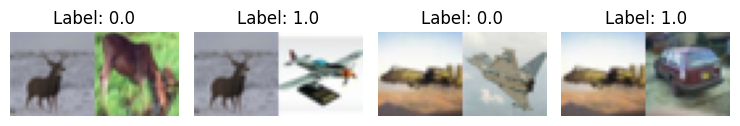

In [25]:
visualize(pairs_train[:-1], labels_train[:-1], to_show=4, num_col=4)

In [26]:
# Split training Pair

x_train_1 = pairs_train[:, 0]  # x_train_1.shape is (60000, 28, 28)
x_train_2 = pairs_train[:, 1]

x_val_1 = pairs_val[:, 0]  # x_val_1.shape = (60000, 28, 28)
x_val_2 = pairs_val[:, 1]

x_test_1 = pairs_test[:, 0]  # x_test_1.shape = (20000, 28, 28)
x_test_2 = pairs_test[:, 1]

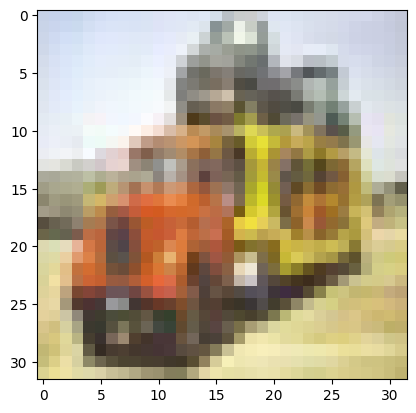

In [27]:
idx = 122
plt.imshow(x_train_1[idx])

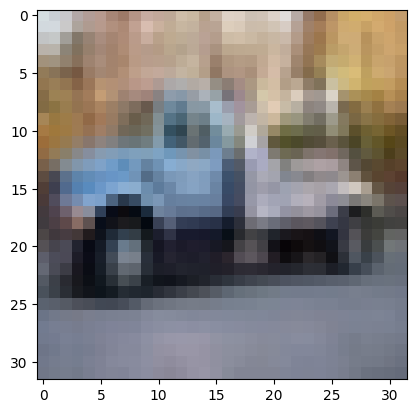

In [28]:
plt.imshow(x_train_2[idx])

In [29]:
print(labels_train[idx])

0.0


In [30]:
print(labels_anchor_train[idx])

9


In [31]:
print(labels_non_anchor_train[idx])

9


In [34]:
import cv2

# Save to numpy and generate
def numpy_save(data_pair, label_pairing, label_anchor, label_non_anchor, set_name:str='train'):
    pair_1, pair_2 = data_pair
    
    # Name config
    # Conevrt image to BGR
    fname_pair_1, fname_pair_2 = [], []
    for idx, pair_image in enumerate(pair_1):
        pair_1_conv = cv2.cvtColor(pair_1[idx], cv2.COLOR_RGB2BGR)
        pair_2_conv = cv2.cvtColor(pair_2[idx], cv2.COLOR_RGB2BGR)
        
        name_pair_1, name_pair_2 = "{}_{}_pair_1.png".format(idx, set_name), "{}_{}_pair_2.png".format(idx, set_name)
        
        cv2.imwrite("dataset/cifar10_randomed/images/" + name_pair_1, pair_1_conv)
        cv2.imwrite("dataset/cifar10_randomed/images/" + name_pair_2, pair_2_conv)
        
        fname_pair_1.append(name_pair_1)
        fname_pair_2.append(name_pair_2)
        
    #pair_1 = pair_1/255
    #pair_2 = pair_2/255
    
    np.savez(
        'dataset/cifar10_randomed/{}.npz'.format(set_name),
        pair_1=np.array(fname_pair_1),
        pair_2=np.array(fname_pair_2),
        label_pairing=label_pairing,
        label_anchor=label_anchor,
        label_non_anchor=label_non_anchor
    )

numpy_save(
    data_pair=(x_train_1, x_train_2),
    label_pairing=labels_train,
    label_anchor=labels_anchor_train,
    label_non_anchor=labels_non_anchor_train,
    set_name='train'
)

numpy_save(
    data_pair=(x_test_1, x_test_2),
    label_pairing=labels_test,
    label_anchor=labels_anchor_test,
    label_non_anchor=labels_non_anchor_test,
    set_name='test'
)

numpy_save(
    data_pair=(x_val_1, x_val_2),
    label_pairing=labels_val,
    label_anchor=labels_anchor_val,
    label_non_anchor=labels_non_anchor_val,
    set_name='val'
)

In [ ]:
def euclidean_distance(vects):
    """Find the Euclidean distance between two vectors.

    Arguments:
        vects: List containing two tensors of same length.

    Returns:
        Tensor containing euclidean distance
        (as floating point value) between vectors.
    """

    x, y = vects
    sum_square = ops.sum(ops.square(x - y), axis=1, keepdims=True)
    return ops.sqrt(ops.maximum(sum_square, tf.keras.backend.epsilon()))

In [64]:
def model(image_dim:tuple = (32, 32 ,3)):
    input_layer = tf.keras.layers.Input(shape=image_dim)
    
    x = tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu')(input_layer)
    x = tf.keras.layers.Dropout(0.1)(x)
    x = tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = tf.keras.layers.Dropout(0.1)(x)
    x = tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu')(x)
    x = tf.keras.layers.Flatten()(x)
    
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    x = tf.keras.layers.Dense(32, activation='relu')(x)
    x = tf.keras.layers.Dense(16, activation='relu')(x)
    x = tf.keras.layers.Dense(10)(x)

    embedding_network = tf.keras.Model(input_layer, x)

    input_1 = tf.keras.layers.Input(image_dim)
    input_2 = tf.keras.layers.Input(image_dim)
    
    tower_1 = embedding_network(input_1)
    tower_2 = embedding_network(input_2)
                                 
    merged_layer = tf.keras.layers.Lambda(euclidean_distance, output_shape=(1,))(
        [tower_1, tower_2]
    )
    
    bn_layer = tf.keras.layers.BatchNormalization()(merged_layer)
    output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(bn_layer)
    siamese = tf.keras.Model(inputs=[input_1, input_2], outputs=output_layer)
    
    return siamese

In [65]:
siamese = model(image_dim=(32, 32, 3))

In [66]:
def loss(margin=1):
    """Provides 'contrastive_loss' an enclosing scope with variable 'margin'.

    Arguments:
        margin: Integer, defines the baseline for distance for which pairs
                should be classified as dissimilar. - (default is 1).

    Returns:
        'contrastive_loss' function with data ('margin') attached.
    """

    # Contrastive loss = mean( (1-true_value) * square(prediction) +
    #                         true_value * square( max(margin-prediction, 0) ))
    def contrastive_loss(y_true, y_pred):
        """Calculates the contrastive loss.

        Arguments:
            y_true: List of labels, each label is of type float32.
            y_pred: List of predictions of same length as of y_true,
                    each label is of type float32.

        Returns:
            A tensor containing contrastive loss as floating point value.
        """

        square_pred = ops.square(y_pred)
        margin_square = ops.square(ops.maximum(margin - (y_pred), 0))
        return ops.mean((1 - y_true) * square_pred + (y_true) * margin_square)

    return contrastive_loss

In [67]:
siamese.compile(
    loss=loss(margin=1),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
    metrics=["accuracy"]
)
siamese.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_26      │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_27      │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_16       │ (None, 10)        │  1,079,370 │ input_layer_26[0… │
│ (Functional)        │                   │            │ input_layer_27[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_8 (Lambda)   │ (None, 1)         │          0 │ functional_16[0]… │
│                     │                   │            │ functional_16[1]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1)         │          4 │ lambda_8[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_37 (Dense)    │ (None, 1)         │          2 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,079,376 (4.12 MB)

 Trainable params: 1,079,374 (4.12 MB)

 Non-trainable params: 2 (8.00 B)

In [68]:
epochs = 15

history = siamese.fit(
    [x_train_1, x_train_2],
    labels_train,
    validation_data=([x_val_1, x_val_2], labels_val),
    #batch_size=batch_size,
    epochs=epochs,
)

Epoch 1/15


/home/islab-ai/.local/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_140', 'keras_tensor_141']. Received: the structure of inputs=('*', '*')
  warnings.warn(


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.5797 - loss: 0.2452 - val_accuracy: 0.6424 - val_loss: 0.2193
Epoch 2/15
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6470 - loss: 0.2193 - val_accuracy: 0.6754 - val_loss: 0.2057
Epoch 3/15
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6766 - loss: 0.2068 - val_accuracy: 0.6940 - val_loss: 0.1993
Epoch 4/15
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6936 - loss: 0.1992 - val_accuracy: 0.6999 - val_loss: 0.1959
Epoch 5/15
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7083 - loss: 0.1912 - val_accuracy: 0.7077 - val_loss: 0.1889
Epoch 6/15
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7297 - loss: 0.1808 - val_accuracy: 0.7151 - val_loss: 0.1864
Epoch 7/15
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7460 - loss: 0.1725 - val_accuracy: 0.7122 - val_loss: 0.1895
Epoch 8/15
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7609 - loss: 0.1643 - val_accura